# ECON8022/4422 Macroeconomic Theory


### Tutorial 5

Simon Mishricky

ANU email: u5009764@anu.edu.au

## Exercise 0 (Simulating a Markov Chain)

Consider a Markov Chain $(\mu_0, P)$, where $\mu_0$ is its initial unconditional distribution over the state space $Z$ which is a finite set. $P$ is the Markov matrix. The code cell immediately below gives you a function that simulates a sample trajectory of the Markov chain.

Let:

$$P = 
\left[\begin{array}{cc} 
0.5 & 0.5\\
0.075 & 0.925
\end{array}\right]
$$ 

Represent the transition probability (i.e. Markov/stochastic) matrix of an income/endowment process of an agent. Without loss assume a unifirom initial distribution, $\mu_0 = (0.5, 0.5)$ over the state space $Z:=\{ 0.1, 100 \}.$

1. What is the probability of observing a sample path $(z_0, z_1, z_2, z_3, z_4) = (0.1, 0.1, 100, 100, 0.1)$?
2. Recall that we can show: $\mu_t = \mu_0P^t$? Plot the unconditional distribution of the Markov chain at:
    - $t=0$
    - $t=1$
    - $t=300$
    - $t=10000$
    
3. Simulate a realisation of the Markov chain for $T=10000$ periods. Count the frequency of observations of each outcome, i.e. each realised state. Comment on your answer and compare with your theoretical calculation from the last part.

## Answers

Part 1. 

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import fminbound

In [2]:
# State space
Z = np.array([0.1, 100.0])

# Stochastic Matrix
P = np.array(([0.5, 0.5], [0.075, 0.925]))

# Initial Distribution
μ_0 = np.array([0.5, 0.5])

In [3]:
Prob = μ_0[0] * P[0, 0] * P[0, 1] * P[1, 1] * P[1, 0]
print(Prob)

0.008671875


Part 2.

In [4]:
μ = lambda t: μ_0 @ np.linalg.matrix_power(P, t)
T = np.array([0, 1, 300, 10000])

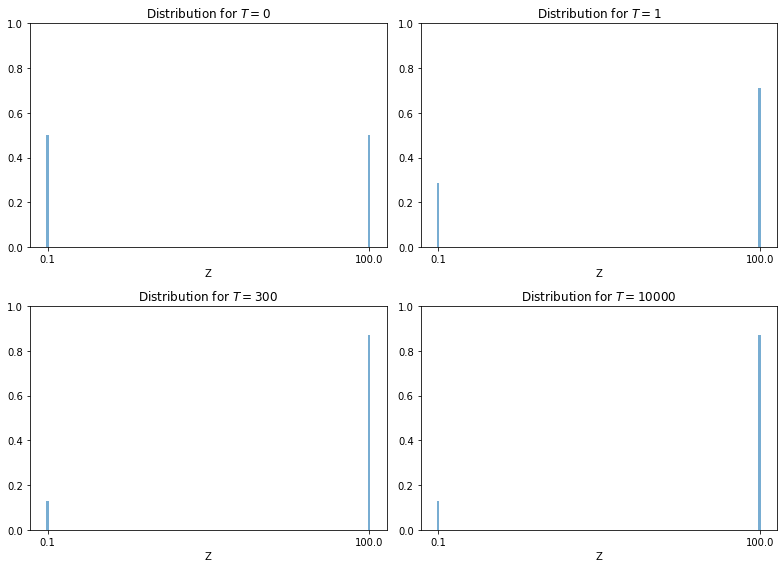

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
axes = axes.flatten()

for s, t in enumerate(T):
    
    ax = axes[s]
    axes[s].set_title('Distribution for $T =$' + str(t))
    ax.set_xlabel('Z')
    ax.set_ylim([0, 1])
    ax.set_xticks([0.1, 100])
    ax.bar(Z, μ(t), lw=1, alpha=0.6)
    
plt.tight_layout()
plt.show()

Part 3.

In [6]:
# Functions
def pick(Z, q):
    
    return np.random.choice(Z, replace=False, p = q)

def Markov_Chain(Z, P, μ, T):
    
    MC = np.zeros(T)
    MC[0] = pick(Z, μ)
    
    for t in range(T - 1):
        
        s = Z.tolist().index(MC[t])
        
        MC[t + 1] = pick(Z, P[s, :])
    
    return MC

def Stationary_Distribution(P):
    
    Eig = P.T - np.eye(P[1, :].size)
    z = np.zeros(P[1, :].size)
    
    # Changing the last row to ones, to avoid the trivial solution
    Eig[-1, :] = np.ones(P[1, :].size)
    z[-1] = 1.0

    μ_inf = np.linalg.solve(Eig, z)
    
    return μ_inf

We are solving:

$$\mu_{\infty} = \mu_{\infty} P$$

Re-arranging:

$$\mu_{\infty} - \mu_{\infty} P = \textbf{0}$$

This becomes 

$$\mu_{\infty} (\textbf{I} - P) = \textbf{0}$$

Taking the transpose:

$$(P^{T} - \textbf{I}) \mu_{\infty}^T = \textbf{0}$$

Since our matrix $(P^{T} - \textbf{I})$ is of the form:

$$
\left[\begin{array}{cc} 
a & -b\\
-a & b
\end{array}\right]
$$ 

We can change the last row to ones, and the last element of the zero vector to one to get

$$
\left[\begin{array}{cc} 
a & -b\\
1 & 1
\end{array}\right] \left[\begin{array}{c}
                           x\\
                           y
                           \end{array}\right] = \left[\begin{array}{c}
                                                       0\\
                                                       1
                                                       \end{array} \right]
$$ 

and since all of the elements are less than one, our function solves $x + y = 1$

In [7]:
μ = Stationary_Distribution(P)
μ

array([0.13043478, 0.86956522])

In [8]:
# Time series length
T_size = 1000
T_min = 0.0
T_max = 1000
T = np.linspace(T_min, T_max, T_size)

# Realisation of the Markov Chain
μ = Stationary_Distribution(P)
chain = Markov_Chain(Z, P, μ, T.size)

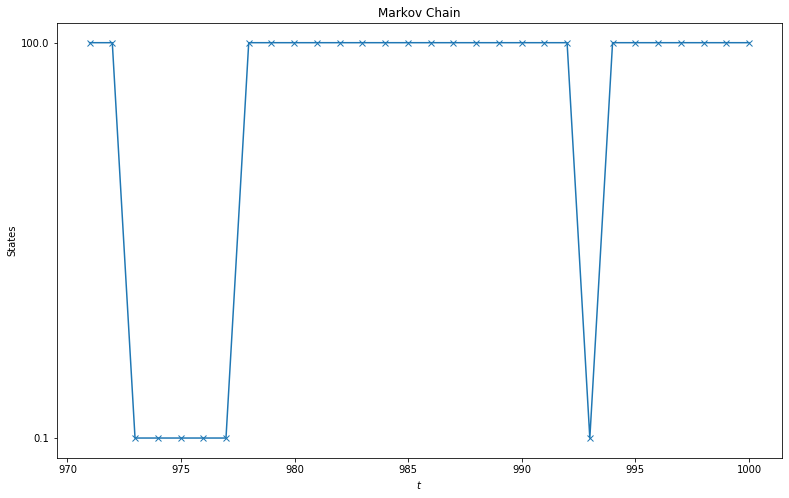

In [9]:
fig, ax = plt.subplots(figsize=(13, 8))

ax.set_title('Markov Chain')
ax.set_xlabel('$t$')
ax.set_ylabel('States')
ax.set_yticks(Z)
ax.plot(T[T.size - 30: T.size], chain[T.size - 30: T.size], 'x-')
plt.show()

## Exercise 1 (Labor Market and Markov Chains) (Assessment)

Suppose the long-run labor force of an economy is constant given by $\bar{L} \equiv 1$. The variables $E_t$ and $U_t$, respectively, denote rates of employment and unemployment. For each date $t \geq 0$, the model says:

$$E_t + U_t = \bar{L}$$

and, 

$$U_{t + 1} = sE_t + (1 - f)U_t$$

where $0 < f < 1$ is the job finding probability of an individual, and, $0 < s < 1$ is the probability that an existing match between a job and a worker gets destroyed.

1. Show that this model of unemployment can be represented as a Markov chain. What is the chain's state space? What is the Markov matrix? Draw the automaton of this system

2. The Markov chain has a unique stationary distribution. TRUE or FALSE? Prove or explain

3. A steady state in this economy in when $U_t$ and $E_t$ remain constant through time. Derive a useful (i.e. an interpretable) condition that determines the steady state distribution of individuals. Explain what this condition says.

4. How does the long run (stationary) measure of individuals in each possible state vary with $s$, and with $f$? (Study each case separately). Suggest some interpretations of your findings, using an example for each case. (Your interpretations would be external to this model, since $s$ and $f$ are taken as parameters at the moment).

## Exercise 2 (Politics) (Assessment)

Consider a statistical model of voters' party affiliation over multiple periodsd. One period is taken to mean one election cycle. Suppose a voter's chosen party affiliation may switch, only by voting  $\textit{Other}$. ($\textit{Other}$ is a short-hand for a state of either abstaining from voting for one period, or, of voting for some other non-Republican and non-Democrat party).

Let $s_1$ denote the state that the voter votes $\textit{Democrat}$, $s_2$ the state for $\textit{Republican}$, and $s_3$ for $\textit{Other}$, in a given election period. Empirical evidence sugests that a Democrat voter will vote $\textit{Other}$ $\frac{1}{2}$ of the time in the following election, a Republican voter will vote $\textit{Other}$ $\frac{1}{4}$ of the time, while a voter who had voted $\textit{Other}$ is equally likely to vote $\textit{Democrat}$ or $\textit{Republican}$ party in the next election, but not $\textit{Other}$. The state space here is $S = \{s_1, s_2, s_3 \}$.

1. Find the transition matrix and sketch a diagram that describes the evolution of random voting outcomes.
2. The probability that a person who voted $\textit{Democrat}$ this period will vote $\textit{Other}$ three periods from now is $\frac{1}{2}$. TRUE or FALSE? Explain

## Exercise 3

Consider the stochastic growth model. Assume that technology can take on finitely many state, $z \in Z \subset \mathbb{R}$. Also assume that the stochastic process $\{z_t\}_{t \in \mathbb{N}}$ is governed by a time-homogenous Markov chain on the set $Z$, $(\mu, P)$.
Suppose we let $Z = \{0.504, 1.008, 1.512\}$ and,
$$P = 
\left[\begin{array}{ccc} 
0.671 & 0.029 & 0.3\\
0.145 & 0.778 & 0.077\\
0.0 & 0.508 & 0.492
\end{array}\right]
$$ 

The planner saves in terms of capital shock $k_t$. Capital evolves according to:

$$k_{t + 1} = f(k_t, z_t) + (1 - \delta)k_t - c_t$$

with $k_0$ given, and $f(k, z) = zk^{\alpha}$, where $\alpha \in (0, 1)$. At the begining of each date $t$, $k_t$ would be fixed, and, $z_t$ is realised by agents. Given initial states $(k_0, z_{-1}) \in X \times Z$, agents have an expected-utility function over stochastic consumption outcomes:

$$u(c_0) + \mathbb{E}_z \left[ \sum_{t = 1}^{\infty}\beta^t u(c_t)\right]$$

where $\beta \in (0, 1)$ and $c_t = h(k_t, z_t)$, which is the decision/control function.

Suppose our utility function takes the form:

$$u(c) = \lim_{\theta' \rightarrow \theta} \frac{c^{1 - \theta'} - 1}{1 - \theta'}$$

Where $\theta > 0$

1. Write the Pareto planner's expected utility maximisation problem as a recursive two-period problem (i.e. the Bellman equation), begining at any initial state $(k, z)$
2. Prove that there is a unique value function satisfying the Bellman principle of optimiality in this example
3. Derive the corresponding first order conditions for the planning problem. Evaluate this at a steady state where $z$ is at its unconditional mean: $z_t = \mathbb{E}[z_t] = \bar{z}$, and $k_{t + 1} = k_t = \bar{k}$. Assume that the model frequency is quarterly. Show that your derived condition can be used as a mapping between (measurable) long-run data average of capital-to-outut ratio, and the parameter $\alpha$. Also, if you were given information about the long run investment-to-capital ratio, can you calibrate $\delta$
4. Adapt the previous Deterministic Dynamic Program to solve for the planner's value function $(k, z) \rightarrow V(k, z)$ and consumption policy function $(k, z) \rightarrow h(k,z)$. With parameters $\beta = 0.98$, $\alpha = 0.33$, $\theta = 1.5$, $\delta = 0.019$ and $P$ has been estimated above
5. Given your (approximate) solution for $h$, simulate a sample path of length $T=500$ for the shocks $z$ Then simulate the resulting consumption, output and investment flows. Plot you resulting data  and compute the relevant statistics summarising the simulated data (e.g. standard deviation, correlations with output)
6. Define a Recursive Competitive Equilibrium for this economy, find the corresponding trajectory of the competitive equilibirum prices of labour and capital

## Answers

1. Given a consumption stream $\{c_t\}_{t=0}^{\infty}$, we have the lifetime utility function $V$:

$$V(\{c_t\}) = u(c_0) + \mathbb{E}_z \left[\sum_{t = 1}^{\infty} \beta^t u(c_t) \right]$$

$$V_t = u(c_0) + \beta \mathbb{E}\left[u(c_1) + \beta u(c_2) + ...\right]$$

   Defining the above function recursively:

$$V_t(k_t,z_t) = u(c_t) + \beta \mathbb{E}[V_{t + 1}(k_{t + 1}, z_{t + 1})]$$

2. Assume that $V$ is a continuously differentiable function on the set $X$. The first order condition for the maximum problem of the Bellman equation is:

$$-[c(k_t, z_t)]^{- \theta} + \beta \sum_{z_{t + 1} \in Z}\frac{dV(k_{t + 1}, z_{t + 1})}{dk_{t + 1}}P(z_{t + 1}|z) = 0$$

Apply the envelope theorem (also known as the Benveniste-Scheinkman formula):

$$\frac{dV(k_t, z_t)}{dk_t} = u_c(c_t) \times f_k(k_t, z_t)$$

$$= c_t^{- \theta} \times [\alpha z_t k_t^{\alpha - 1} + (1 - \delta)]$$

This tells us how much the agent's indirect utility function changes with small changes in $k$

Use this last expression, updated one period ahead, we have:

$$\frac{dV(k_{t + 1}, z_{t + 1})}{dk_{t + 1}} = c_{t + 1}^{- \theta} \times [\alpha z_{t + 1} k_{t + 1}^{\alpha - 1} + (1 - \delta)]$$

Substituting this the first order condition, we get:

$$[c(k_t, z_t)]^{- \theta} = \beta \sum_{z_{t + 1} \in Z} [c(k_{t + 1}, z_{t + 1})]^{- \theta} [\alpha z_{t + 1} k_{t + 1}^{\alpha - 1} + (1 - \delta)] P(z_{t + 1}|z)$$

This is the Euler equation

3. See Tim's Answer

4. Adapting the algorithm from last week

In [10]:
# Parameters
β = 0.982
α = 0.330
θ = 1.500
δ = 0.019

In [11]:
# Markov Chain components
Z = np.array([0.504, 1.008, 1.512])
P = np.array(([0.671, 0.029, 0.300],
              [0.145, 0.778, 0.077],
              [0.000, 0.508, 0.492]))

In [12]:
# Functions
def u(c):
    if θ == 1.0:
        u = np.log(c)
    elif θ != 0.0 and θ > 0.0:
        u = (c**(1 - θ) - 1)/(1 - θ)
    return u

# Production function with depreciation
f = lambda k, z: z * k**α + (1 - δ) * k

# Interpolation function
def w_func(x, w, Z):
    
    # Storage space
    v = np.zeros(Z.size)
    
    for i in range(Z.size):
        v[i] = np.interp(x, grid, w[:, i])

    return v    
        
def bellman_operator(grid, Z, w):
    
    # Storage Space
    Tw = np.zeros((grid.size, Z.size))
    c_star = np.zeros((grid.size, Z.size))
    k_star = np.zeros((grid.size, Z.size))
    
    for j, z in enumerate(Z):
        for i, k in enumerate(grid):
            y = f(k, z)
            objective = lambda c: - (u(c) + β * (w_func(y - c, w, Z) @ P[j, :]))
            c_star[i, j] = fminbound(objective, 1e-6, y)
            Tw[i, j] = - objective(c_star[i, j])
            k_star[i, j] = y - c_star[i, j]
            
    return Tw, c_star, k_star

def supremum_norm(function1, function2):
    return (np.abs(function1 - function2)).max()

def compute_fixed_point(grid, Z, initial_w, MAXITER, ϵ):
    
    # Store Distance values
    dist_vals = []
    
    # Iterate to find fixed point
    for i in range(MAXITER):
        
        Tw, c_star, kn_star = bellman_operator(grid, Z, initial_w)
        dist = supremum_norm(Tw, initial_w)
        initial_w = Tw
        dist_vals.append(dist)
        
        if dist < ϵ:
            break
            
    return initial_w, c_star, kn_star, np.asarray(dist_vals)

In [13]:
# Grid
kss = 26.642
kmin = kss * 0.01
kmax = kss * 1.3
grid_size = 50
grid = np.linspace(kmin, kmax, grid_size)

In [14]:
# Miscellaneous
MAXITER = 200
ϵ = 1e-5

In [15]:
# Initial Guess
initial_v = np.ones((grid.size, Z.size))

# Single Instance of the Bellman Operator
initial_w, c_star, k_star = bellman_operator(grid, Z, initial_v)

In [16]:
# Computing the fixed point
v, c_star, kn_star, dist = compute_fixed_point(grid, Z, initial_v, MAXITER, ϵ)

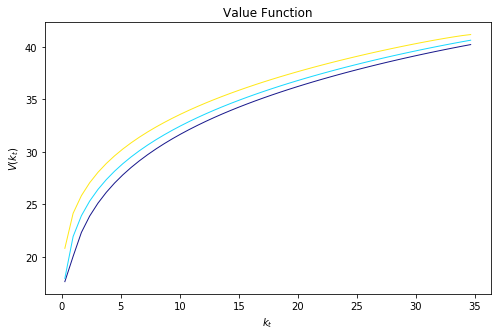

In [17]:
# Plotting the Value Function
fig, ax = plt.subplots(figsize=(8, 5))

for j in range(Z.size):
    
    ax.set_title('Value Function')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$V(k_t)$')
    ax.plot(grid, v[:, j], color=plt.cm.jet(j / Z.size), lw=1, alpha=0.9)

plt.show()

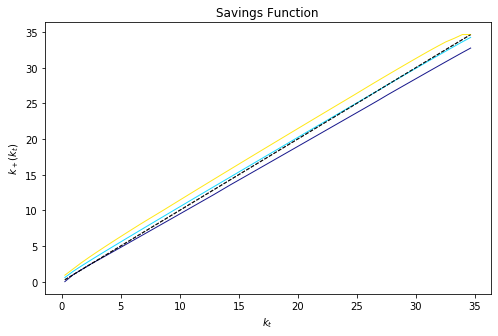

In [18]:
# Plotting the Savings Function
fig, ax = plt.subplots(figsize=(8, 5))

for j in range(Z.size):
    
    ax.set_title('Savings Function')
    ax.set_xlabel('$k_t$')
    ax.set_ylabel('$k_+(k_t)$')
    ax.plot(grid, kn_star[:, j], color=plt.cm.jet(j / Z.size), lw=1, alpha=0.9)
    ax.plot(grid, grid, 'k--', lw=1, alpha=0.6)

plt.show()

5. First we need to generate realisations of the Markov chain

The algorithm below simulates a time series for for $z$, $y$, $c$ and $k$

In [19]:
# Functions
def pick(Z, q):
    
    return np.random.choice(Z, replace=False, p = q)

def Markov_Chain(Z, P, μ, T):
    
    MC = np.zeros(T)
    MC[0] = pick(Z, μ)
    
    for t in range(T - 1):
        
        s = Z.tolist().index(MC[t])
        
        MC[t + 1] = pick(Z, P[s, :])
    
    return MC

In [20]:
# Grid
T_size = 120
T_min = 0.0
T_max = 120
T = np.linspace(T_min, T_max, T_size)

In [21]:
# Realisations of the Markov Chain
μ = np.array(([0.0, 1.0, 0.0]))
chain = Markov_Chain(Z, P, μ, T.size)

In [22]:
# Generating the policy time series
y = np.zeros(T.size)
σ_k = np.zeros(T.size)
σ_c = np.zeros(T.size)
σ_k[0] = kss

for t in range(T.size - 1):
    
    index_z = Z.tolist().index(chain[t])
    
    σ_k[t + 1] = np.interp(σ_k[t], grid, kn_star[:, index_z])  
    σ_c[t] =  f(σ_k[t], chain[t]) - σ_k[t + 1] 
    y[t] = f(σ_k[t], chain[t]) - (1 - δ) * σ_k[t]

In [23]:
# Storing as an array
variables = np.asarray([chain[:-1], y[:-1], σ_c[:-1], σ_k[:-1]])

In [24]:
# Grid
T_size = 119
T_min = 0.0
T_max = 120
T = np.linspace(T_min, T_max, T_size)

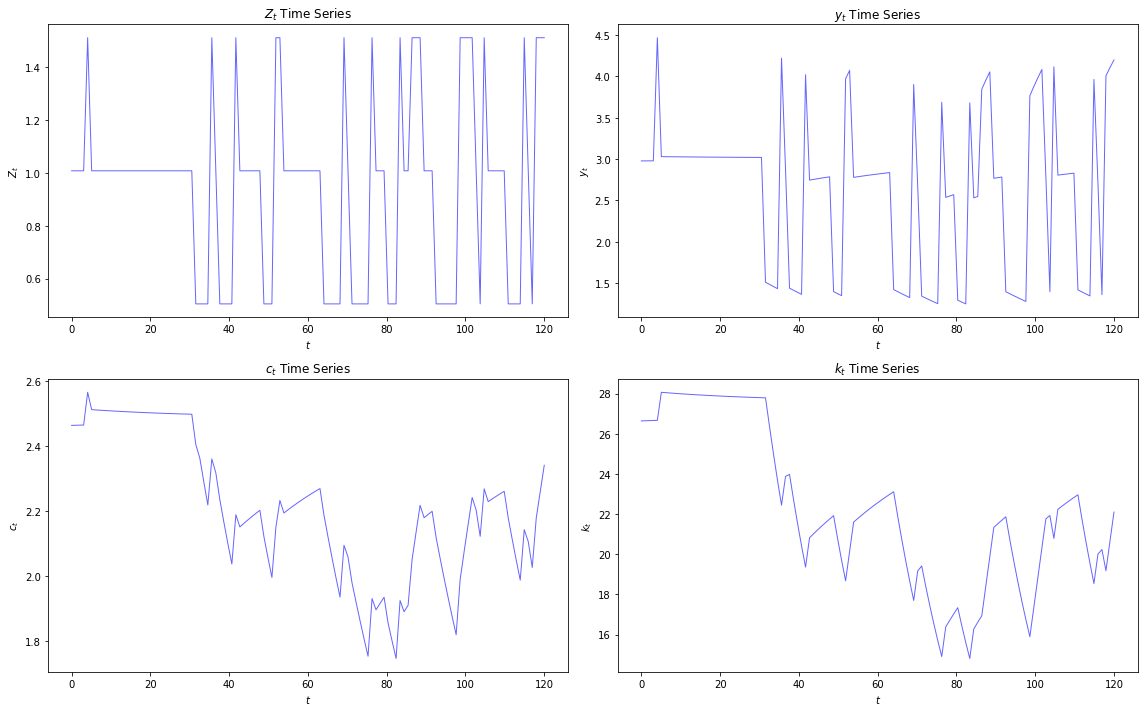

In [25]:
# Plotting time series of the policy functions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

titles = np.array(['$Z_t$ Time Series', 
                   '$y_t$ Time Series',
                   '$c_t$ Time Series',
                   '$k_t$ Time Series'])

label = np.array(['$Z_t$',
                  '$y_t$',
                  '$c_t$',
                  '$k_t$'])

for i, j in enumerate(titles):
    
    ax = axes[i]
    ax.set_title(str(j))
    ax.set_xlabel('$t$')
    ax.set_ylabel(str(label[i]))
    ax.plot(T, variables[i], color='b', lw=1, alpha=0.6)

plt.tight_layout()
plt.show()

In [26]:
# Functions
def price_ts(k, z):
    
    w = np.zeros(k.size)
    r = np.zeros(k.size)
    
    for t in range(k.size):
        
        w[t] = (1 - α) * z[t] * k[t]**α
        r[t] = α * z[t] * k[t]**(α - 1)
        
    return np.asarray([w, r])

In [27]:
# Realisation of the prices over time
ts = price_ts(σ_k[:-1], chain[:-1])

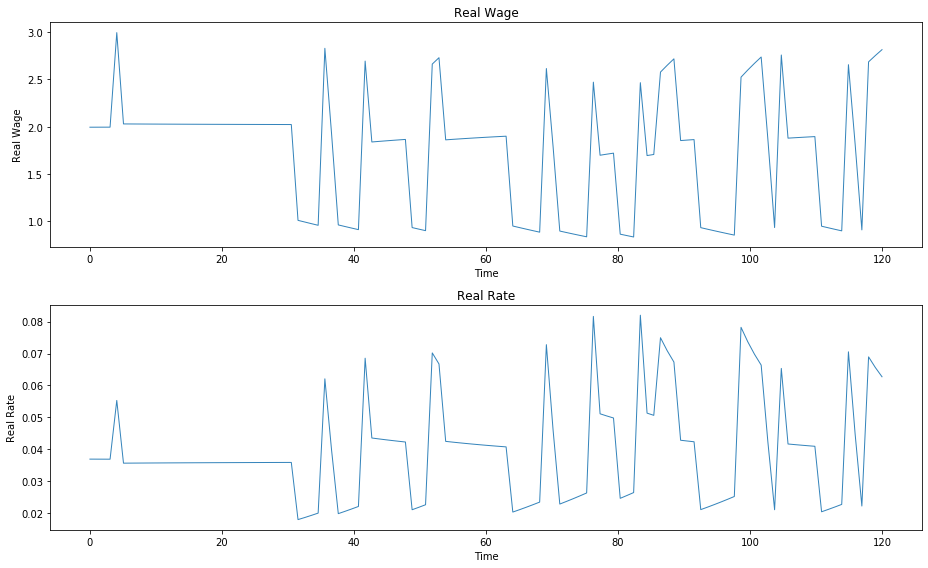

In [28]:
# Plotting time series of the prices
fig, axes = plt.subplots(2, 1, figsize=(13, 8))
axes = axes.flatten()

titles = np.array(['Real Wage',
                   'Real Rate'])

for i, j in enumerate(titles):
    
    ax = axes[i]
    ax.set_title(str(j))
    ax.set_xlabel('Time')
    ax.set_ylabel(str(j))
    ax.plot(T, ts[i], lw=1, alpha=0.9)
    
plt.tight_layout()
plt.show()

## Exercise 4 

*Incomplete markets agent's DP problem*. This exercise is actually a component of a class of incomplete-asset-markets, ex-post heterogeneous agent models due originally to Bewley, and then applied by S. Rao Aiyagari (inequality and the problem of over-saving, 1992, Quarterly J. Econ.) and Mark Huggett (asset pricing risk-free-rate puzzle; 1991, J. Econ Dynamics and Control).

Consider the asset (state) space of an agent called Amelia: $X := [ a_{min}, a_{max} ] \subset \mathbb{R}$. The endowment (state) space is $Z := \{ z_{L}, z_{H} \}$, where $z_{H} > z_{L}$. The consumer's Bernoulli utility function is $U: X \times Z \rightarrow \mathbb{R}$. Consider a fixed market (relative) price $q$ for an asset that delivers a for-sure unit of consumption good in one period. Amelia's current holding of the asset is $a_{t}$ units, and, her next-period asset choice is $a_{t+1}$. Let $x :=: x_{t}$ and $x_{+1} :=: x_{t+1}$ for any date $t$. Her current endownment realization is $z_{t}$. Her current consumption choice is $c_{t}$. Her budget constraint at any date, given any observed state $(a,z)$ is

$
    c + qa_{+1} \leq a + z.
$

Her total lifetime payoff is $\mathbb{E}\left\{ \sum_{t=0}^{\infty}\beta^{t}  U\left(c_{t}\right) | (a_{0},z_{0})\right\}$. She faces an (ad-hoc) borrowing limit: $a \geq \underline{a}$.

1. Prove that there is a unique value function solving Amelia's optimization problem.

2. Argue that her optimal strategy would also be unique.

3. Now, use the specification below to solve Amelia's problem. (*Huh?* Go find her value and policy functions.)

    * $U(c) = \frac{c^{1-\theta}}{1-\theta}$, $\theta = 1.5$
    
    * $q = 1.0129$
    
    * $a_{min} = -2.0$, $a_{max} = 6.0$
    
    * $z_{H} = 1.0$, $z_{L} = 0.1$
    
    * $z_{i}$, $i \in \{L, H\}$, is governed by an initial distribution on $Z$ and a Markov matrix
        $$P = \left[ \begin{matrix} 0.5 & 0.5 \\ 0.075 & 0.925 \end{matrix} \right]$$

4. Now simulate a sample trajectory of Amelia's optimal saving problem, for a sample length $T = 2000$.

5. Given the sample path you just computed, plot its long run distribution.

## Answers

1. The agent's Bellman equation is given by:

$$V(a, z_i) = \max_{(c, a') \in S \times X} \left\{U(c) + \beta \sum_{j=1}^N p_{ij}V(a', z'_j) : c + qa' = a + z\right\}$$

2. Again using Blackwell's Sufficiency Conditions:

(a) Monotonicity: 
Consider any functions $V, W \in B(S)$ such that $V \geq W$, since $p_{ij} \geq 0$ and $\sum_{\forall j}p_{ij} = 1$, then:

$$T \circ V(a, z_i) = \max_{(c, a') \in S \times X} \left\{U(c) + \beta \sum_{j=1}^N p_{ij}V(a', z'_j) \right\} \\ \geq \max_{(c, a') \in S \times X} \left\{U(c) + \beta \sum_{j=1}^N p_{ij}W(a', z'_j)\right\} = T \circ W(a, z_i)$$

(b) Discounting:
Second, if we add a constant function $k: S\times X \rightarrow \mathbb{R}$ such that $k(a, z_i) = \kappa$ for all $z_i \in X$, to $V \in B(S)$ and apply operator $T$ on the resulting function

$$T (V + k)(a, z_i) = \max_{(c, a') \in S \times X} \left\{U(c) + \beta \sum_{j=1}^N p_{ij}V(a', z'_j) + \beta \kappa \right\} = T V(a, z_i) + \beta \kappa$$

Therefore $T$ is a $\beta$-modulus contraction, and since $V \in B(S)$ and $(B(S), d_{\infty})$ is a complete metric space, the conditions for Banach's Fixed Point theorem are satisfied. Therefore there exists a unique fixed point to the Bellman equation.

3.

In [29]:
# Parameters
q = 1.0129
β = 0.99322

In [30]:
# Markov chain components
X = np.array([0.100, 1.000])
Q = np.array(([0.500, 0.500],
              [0.075, 0.925]))

In [31]:
# Setting up the grid
a_min = -2.0
a_max = 6
a_size = 50

a_grid = np.linspace(a_min, a_max, a_size)

In [32]:
# Functions
def u(c, θ=1.5):
    if θ == 1.0:
        u = np.log(c)
    elif θ != 0.0 and θ > 0.0:
        u = (c**(1 - θ))/(1 - θ)
    return u

f = lambda a, z: a + z

# Interpolation function
def v_func(x, w, X):
    
    # Storage space
    v = np.zeros(X.size)
    
    for k in range(X.size):
        v[k] = np.interp(x, a_grid, w[:, k])

    return v  

def bellman_operator(a_grid, w, Q, X):
    
    # Storage space
    Tw = np.zeros((a_grid.size, X.size))
    c_star = np.zeros((a_grid.size, X.size))
    a_star = np.zeros((a_grid.size, X.size))
    
    for j, z in enumerate(X):
        for i, a in enumerate(a_grid):
            y = f(a, z)
            a_lb = a_min
            a_ub = min(y, a_max)
            objective = lambda a_plus: - (u(y - (q * a_plus)) + β * (v_func(a_plus, w, X) @ Q[j, :]))
            a_star[i, j] = fminbound(objective, a_lb, a_ub)
            c_star[i, j] = y - q * a_star[i, j]
            Tw[i, j] = - objective(a_star[i, j])
            
    return Tw, c_star, a_star 

def supremum_norm(function1, function2):
    return (np.abs(function1 - function2)).max()

def compute_fixed_point(a_grid, Q, X, initial_w, MAXITER=1000, ϵ=1e-5):
    
    # Store Distance values
    dist_vals = []
    
    # Iterate to find fixed point
    for h in range(MAXITER):
        
        Tw, c_star, a_star = bellman_operator(a_grid, initial_w, Q, X)
        dist = supremum_norm(Tw, initial_w)
        initial_w = Tw
        dist_vals.append(dist)
        
        if dist < ϵ:
            break
            
    return initial_w, c_star, a_star, np.asarray(dist_vals)

In [33]:
# Initial Guess
initial_u = np.ones((a_grid.size, X.size))

# Compute an instance of the Bellman Operator
Tw, c, a = bellman_operator(a_grid, initial_u, Q, X)

In [34]:
# Computing the fixed point
v, c_star, a_star, δ = compute_fixed_point(a_grid, Q, X, initial_u)

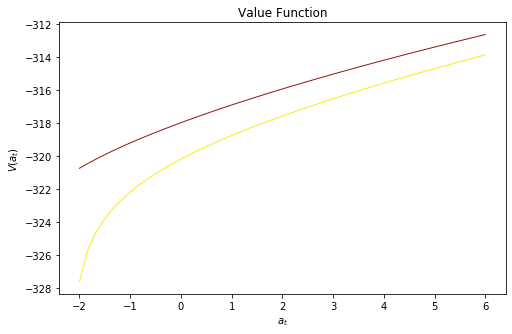

In [35]:
# Plotting the Value Function
fig, ax = plt.subplots(figsize=(8, 5))

for j in range(X.size):
    
    ax.set_title('Value Function')
    ax.set_xlabel('$a_t$')
    ax.set_ylabel('$V(a_t)$')
    ax.plot(a_grid, v[:, j], color=plt.cm.jet(j + 2 / 3), lw=1, alpha=0.9)

plt.show()

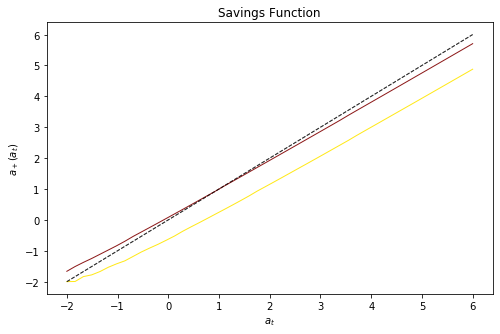

In [36]:
# Plotting the Savings Function
fig, ax = plt.subplots(figsize=(8, 5))

for j in range(X.size):
    
    ax.set_title('Savings Function')
    ax.set_xlabel('$a_t$')
    ax.set_ylabel('$a_+(a_t)$')
    ax.plot(a_grid, a_star[:, j], color=plt.cm.jet(j + 2 / 3), lw=1, alpha=0.9)
    ax.plot(a_grid, a_grid, 'k--', lw=1, alpha=0.6)

plt.show()

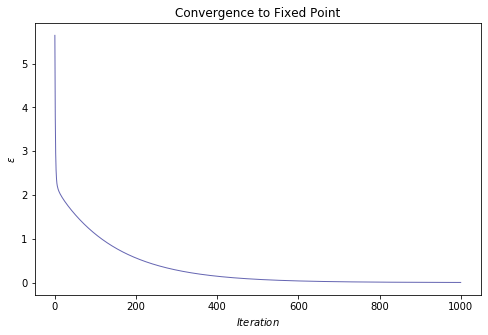

In [37]:
# Plotting
i_min = 0.0
i_max = 1000
i_size = 1000

iteration_grid = np.linspace(i_min, i_max, i_size)

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Convergence to Fixed Point')
ax.set_xlabel('$Iteration$')
ax.set_ylabel(r'$\epsilon$')
ax.plot(iteration_grid, δ, color=plt.cm.jet(0), lw=1, alpha=0.6)
plt.show()

In [38]:
# Time Series length
T = 2000

In [39]:
# Realisations of the Markov Chain
μ = Stationary_Distribution(Q)
chain = Markov_Chain(X, Q, μ, T)

In [40]:
# Generating the policy time series
y = np.zeros(T)
σ_a = np.zeros(T)
σ_c = np.zeros(T)
σ_a[0] = 0.0 

for t in range(T - 1):
    
    index_x = X.tolist().index(chain[t])
    if σ_a[t] <= a_min:
        σ_a[t + 1] = a_star[0, index_x]
    elif σ_a[t] >= a_max:
        σ_a[t + 1] = a_star[-1, index_x]
    else:
        σ_a[t + 1] = np.interp(σ_a[t], a_grid, a_star[:, index_x])  
    
    σ_c[t] =  f(σ_a[t], chain[t]) - (q * σ_a[t + 1])

In [41]:
# Storing as an array
variables = np.asarray([σ_a[:-1], σ_c[:-1]])

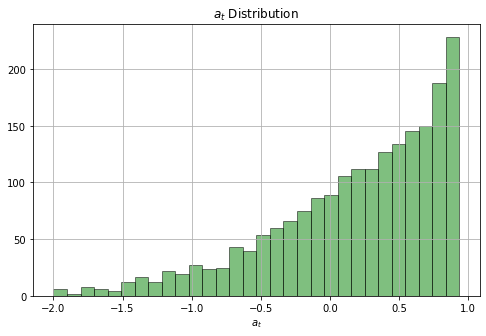

In [42]:
# Plotting distribution of the policy functions
bins = 30
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('$a_t$ Distribution')
ax.set_xlabel('$a_t$')
ax.hist(variables[0], bins, color='green', alpha=0.5, edgecolor='black')
ax.grid(True)
plt.show()

## Exercise 5 (Assessment)

Do Question 1 from the 2015 Final Exam.

## Exercise 6

Consider Nobel Laurete Robert E. Lucas' 1978 model, which provides a microeconomic foundation for the CAPM asset-pricing model in finance. We have a world of identical agents with population of size 1. Each representative agent solve a lifetime expected utility maximisation problem, given exogenous and random streams of the economy's income $\left\{Y_t \right\}_{t \in \mathbb{N}}$.

The agent can demand/purchase shares $s_t \in [0,1]$ of the random income stream, and/or consume $c_t$ given initial income $Y_t$ each period. Since income prospects are risky, given optimal demand for consumption and share, the question is: what are the market prices for these shares contignet on the random income states.

The agent's utility of consumption per period is given by a strictly increasing, concave and continuously differentiable function $U: \mathbb{R}_{+} \rightarrow \mathbb{R}$, where $\lim_{c \rightarrow 0} U'(c) = + \infty$ and $\lim_{c \rightarrow +\infty}U'(c) = 0$. His objective function is total expected discounted utility: 

$$\mathbb{E}\left[\sum_{t = 0}^{\infty}\beta^t U(c_t) |Y_0 \right]$$

The individual's share and consumption demands must respect feasibility, $s_t \in [0, 1]$ and $0 \leq c_t \leq Y_t$, respectively. Let $q(Y_t)$ denote an equilibrium price of share contingent on state $Y_t$, which is taken as given by the agent. Further, the consumer's state-contingent plan must respect his sequential budget constraint:

$$c_t + q(Y_t)s_{t+1} \leq \left[Y_t + q(Y_t) \right]s_t$$

Assume that $\left\{Y_t\right\}_{t \in \mathbb{N}}$ is generated by an ergodic finite-state-space Markov chain $(\mu_0, P)$ where $\mu_0$ is the initial unconditional distribution of $Y_0$ and $P$ is a Markov matrix, whose elements are denoted by $p_{ij} := \mathbb{P}\left\{Y_{t+1} = j| Y_t = i\right\} > 0$, for all $i, j \in S := \left\{y_1, y_2, ..., y_N\right\}$, and $N$ is a finite positive integer.

1. Let $V(s_0, Y_0)$ be the agent's indirect utility start ut at aggregate state $Y_0$ with share $s_0$. Write down the agent's Bellman equation. 
2. Denote $U'$ as the first derivative of $U$. It can be shown that the necessary and sufficient first-order (Euler) conditions for utility-maximisation of the agent has the form:

$$U'(c(y_i))q(y_i) = \beta \sum_{j = 1}^{N}U'(c(y'_j))[q(y'_j) + y'_j]p_{ij} \quad \forall y_i \in S$$

>which holds for every period $t \in \mathbb{N}$. Show that you can derive this from the maximum $\quad$ problem in the Bellman equation. $\textit{Hint:}$ Assume that the value function $(s_t, Y_t) \rightarrow V(s_t, Y_t)$ is differentiable with respect to $s_t$. 

>Please try to interpret what these conditions mean. How many of these conditions are there that have to be satisfied?
    
3. Argue that the competitive equilibrium solution in terms of the demand functions $Y_t \rightarrow c(Y_t)$ and $Y_t \rightarrow s(Y_t)$ is such that $c(Y_t) = Y_t$ and $s(Y_t) = 1$ for all realisations $Y_t = y_i \in S$
4. From the last section, we know that in equilibrium, $c(Y_t) = Y_t$ and $s(Y_t) = 1$, so that given supply $Y_t = y_i$, we can "back out" the equilibrium asset pricing function $q$. Here's how we can back it out, implicitly. In equilibrium, the first order conditions reduce to

$$U'(c(y_i))q(y_i) = \beta \sum_{j = 1}^{N}U'(c(y'_j))[q(y'_j) + y'_j]p_{ij} \quad \forall y_i \in S$$

>If we define the composite function $h = U' \circ q$, the the first-order conditions in equilibrium characterise the solution $h$ as a fixed point of the operator

$$h^{n+1}(y_i) = \beta \sum_{j=1}^N\left[U'(y'_j)y'_j \right]p_{ij} + \beta \sum_{j=1}^{N}h^n(y'_j)p_{ij} \equiv T(h^n)(y_i) \quad \forall y_i \in S$$

>for $n = 0,1,2, ..$

>>(a) The last equation above suggest an Euler operator. Just as we have done with the Bellman operator, verify that the equilibrium solution $h = \lim_{n \rightarrow \infty}T^n(h^0)$ in this instance is unique, given any initial continuously differentiable function $h^0: S \rightarrow \mathbb{R_+}$. 
    
>>(b) What is an economic name for the value $h(y_i)$? If you knew the solution $h$, how would you calculate the equilibirum asset pricing function?

## Answers

1. The agent's Bellman equation is 

$$V(s, y_i) = \max_{c\in[0, y_i], s' \in [0, 1]} \left\{U(c) + \beta \sum_{j = 1}^{N}p_{ij}V(s', y'_j): 
\space c + q(y_i)s' = [y_i + q(y_i)]s \right\}$$

Given initial state $(s, Y) \in [0,1] \times S$

2. The first order condition with respect to $s'$ is:

$$-U'(c(y_i))q(y_i) + \beta \sum_{j=1}^N V_s(s',y'_j)p_{ij} = 0$$ 

The envelope condition is $V_s(s, Y) = U'(c)[q + Y]$, so that the first order condition can be written as 

$$U'(c(y_i))q(y_i) = \beta \sum_{j = 1}^{N}U'(c(y'_j))[q(y'_j) + y'_j]p_{ij} \quad \forall y_i \in S$$

The equations say the following. On the LHS is the current marginal utility value of giving up some consumption in favour of buying shares $s'$ at the current state dependant price $q(y_i)$. On the RHS is the expected marginal utility value of the addition share $s'$ purchased, which is made up of two components: (i) the future capital gains component via stochastic price $q(y'_j)$, and, (ii) the dividend component from owing the share $s'$ . Since the state space $[0,1]\times S$ containing $(s, Y)$ is an infinite set, there are uncountably many such first order conditions to satisfy.

3. Since we have a population of size 1 of identical agents, each agent would make idnetical optimal choices $c$ or $s'$, in each date and state. Consider the complementary choice $s'$ on share holdings. Since total shares demanded must add up to $S_t = 1$ in equilibrium, and each measure zero agent on $[0,1]$ demands $s'$ per capita, then it must be that $s_t = S_t = 1$. By the same aregument per capital consumption demand equals aggregate consumption demand, which must clead the goods markets, hence $c_t = Y_t$ every period, every state.

4. Working on the space of bounded functions $B(S)$ such that $f: S \rightarrow \mathbb{R}$. We will use Blackwell's Sufficiency Conditions.

First, consider any functions $f, g \in B(S)$ such that $f \geq g$, since $p_{ij} \geq 0$ and $\sum_{\forall j}p_{ij} = 1$, then: 

$$T \circ f(y_i) = \beta \sum_{j=1}^{N}\left[U'(y'_j)y'_j\right]p_{ij} + \beta \sum_{j=1}^{N}f(y'_j)p_{ij}$$

$$\quad \geq \beta \sum_{j=1}^{N}\left[U'(y'_j)y'_j\right]p_{ij} + \beta \sum_{j=1}^{N}g(y'_j)p_{ij} = T \circ g(y_i)$$

Therefore, $T$ preserves monotonicity

Second, if we add a constant function $k: S \rightarrow \mathbb{R}$ such that $k(y_i) = \kappa$ for all $y_i \in S$, to $f \in B(S)$ and apply operator $T$ on the resulting function,

$$T \circ (f + k)(y_i) = \beta \sum_{j=1}^{N}\left[U'(y'_j)y'_j\right]p_{ij} + \beta \sum_{j=1}^{N}\left[f(y'_j) + \kappa\right]p_{ij}$$

$$\quad = T \circ f(y_i) + \beta \kappa$$

Therefore $T$ is a $\beta$-modulus contraction mapping, since $(B(S), d_{\infty})$ is a complete metric space, we have satisfied the conditions for Banach's Fixed Point theorem. Therefore there exists a unique fixed point to the operator $T$

5. The function $h:=U'\circ q$ defines the marginal utility value of asset $s(Y)$ for each state $Y$. How do we back out the equilibrium pricing function? Since the marginal utility function $U'$ is known and its inverse exists, we can solve for:

$$q(Y) = (U')^{-1} \circ h(Y)$$